<a href="https://colab.research.google.com/github/goradiam/ACPML---EDA-Assignment---EDA-on-NYC-Taxi-Records---Submission/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

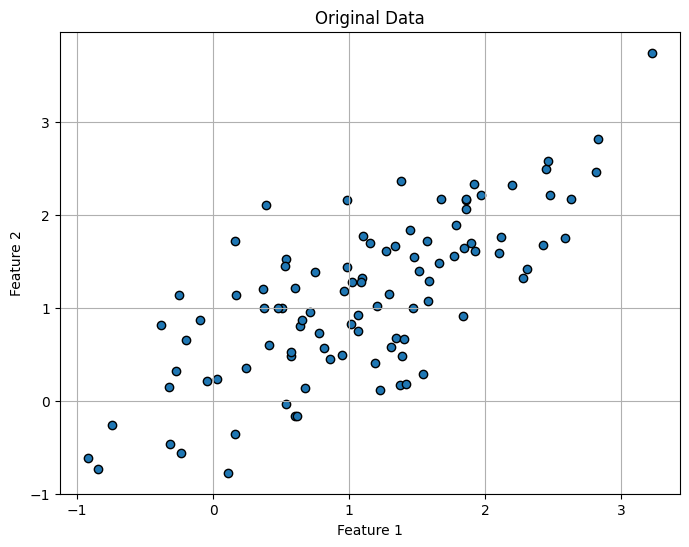

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
mean = [1, 1]
cov = [[1, 0.8], [0.8, 1]]  # covariance matrix
X = np.random.multivariate_normal(mean, cov, 100)

# Plot the original data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], edgecolor='k')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


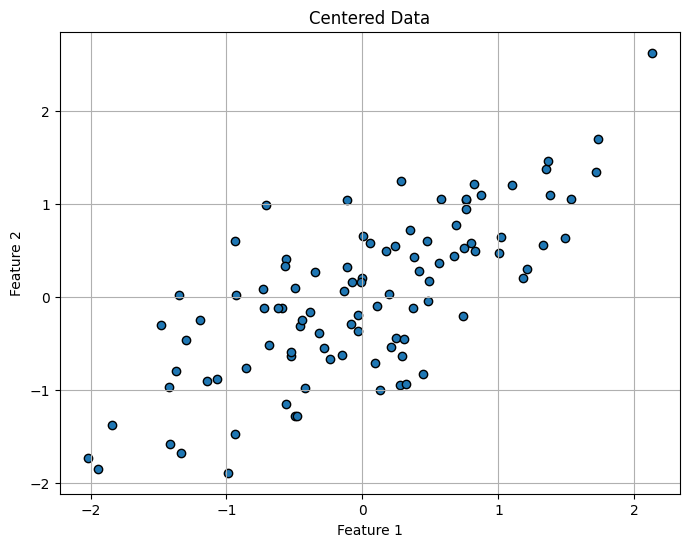

In [ ]:
# Standardize the data (mean = 0)
X_centered = X - np.mean(X, axis=0)

# Plot the centered data
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0], X_centered[:, 1], edgecolor='k')
plt.title('Centered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


In [ ]:
# Compute covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)
print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[0.77630465 0.56017324]
 [0.56017324 0.7431292 ]]


In [ ]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues:
 [1.32013571 0.19929814]
Eigenvectors:
 [[ 0.71749523 -0.69656342]
 [ 0.69656342  0.71749523]]


In [ ]:
# Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("Sorted Eigenvectors:\n", sorted_eigenvectors)


Sorted Eigenvalues:
 [1.32013571 0.19929814]
Sorted Eigenvectors:
 [[ 0.71749523 -0.69656342]
 [ 0.69656342  0.71749523]]


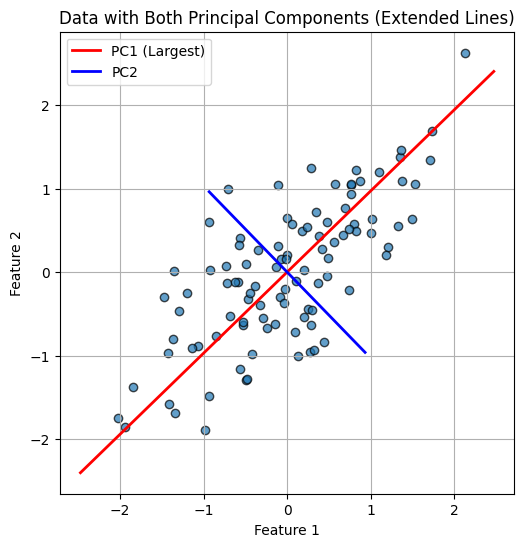

In [ ]:
# Plot the original data
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0], X_centered[:, 1], edgecolor='k', alpha=0.7)

# Extend the lines representing the principal components
scale_factor = 3  # Extend the lines to make them more visible

# First principal component (largest eigenvalue)
pc1_start = -sorted_eigenvectors[:, 0] * np.sqrt(sorted_eigenvalues[0]) * scale_factor
pc1_end = sorted_eigenvectors[:, 0] * np.sqrt(sorted_eigenvalues[0]) * scale_factor
plt.plot([pc1_start[0], pc1_end[0]], [pc1_start[1], pc1_end[1]], color='red', linewidth=2, label='PC1 (Largest)')

# Second principal component
pc2_start = -sorted_eigenvectors[:, 1] * np.sqrt(sorted_eigenvalues[1]) * scale_factor
pc2_end = sorted_eigenvectors[:, 1] * np.sqrt(sorted_eigenvalues[1]) * scale_factor
plt.plot([pc2_start[0], pc2_end[0]], [pc2_start[1], pc2_end[1]], color='blue', linewidth=2, label='PC2')

# Adding legend and titles
plt.title('Data with Both Principal Components (Extended Lines)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()


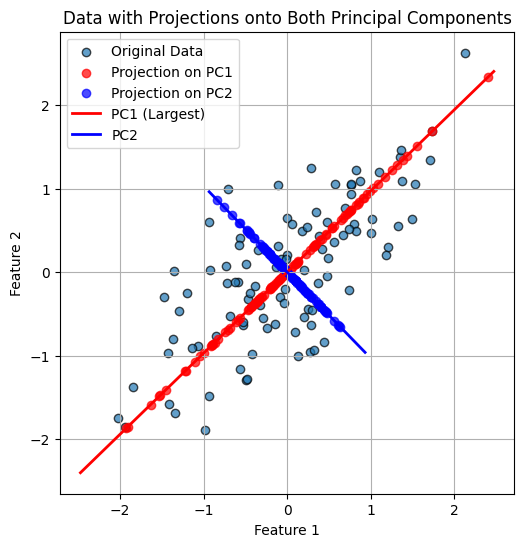

In [ ]:
# Plot the original data
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0], X_centered[:, 1], edgecolor='k', alpha=0.7, label='Original Data')

# Plot the projections on PC1
plt.scatter(X_projected_pc1[:, 0], X_projected_pc1[:, 1], color='red', alpha=0.7, label='Projection on PC1')

# Plot the projections on PC2
plt.scatter(X_projected_pc2[:, 0], X_projected_pc2[:, 1], color='blue', alpha=0.7, label='Projection on PC2')

# Add the principal component lines
plt.plot([pc1_start[0], pc1_end[0]], [pc1_start[1], pc1_end[1]], color='red', linewidth=2, label='PC1 (Largest)')
plt.plot([pc2_start[0], pc2_end[0]], [pc2_start[1], pc2_end[1]], color='blue', linewidth=2, label='PC2')

# Adding legend and titles
plt.title('Data with Projections onto Both Principal Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

plt.grid(True)
plt.show()


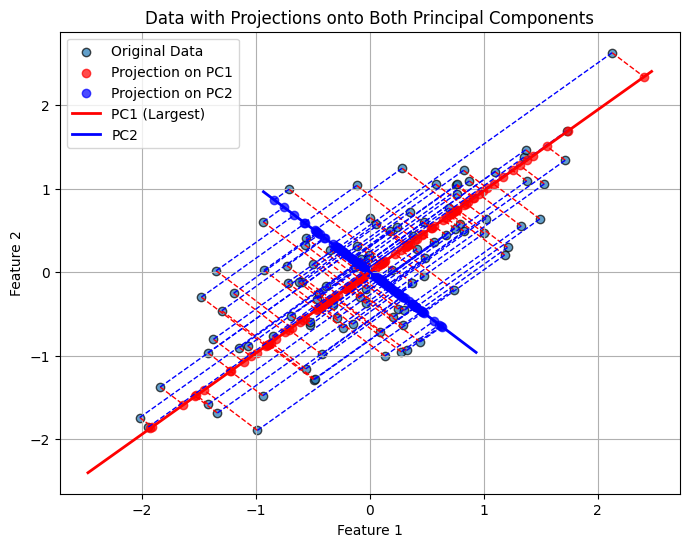

In [ ]:
# Project the data onto the first principal component
X_pca_1d = X_centered.dot(sorted_eigenvectors[:, 0])
X_projected_pc1 = np.outer(X_pca_1d, sorted_eigenvectors[:, 0])

# Project the data onto the second principal component
X_pca_2d = X_centered.dot(sorted_eigenvectors[:, 1])
X_projected_pc2 = np.outer(X_pca_2d, sorted_eigenvectors[:, 1])

# Plot the original data with projections
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0], X_centered[:, 1], edgecolor='k', alpha=0.7, label='Original Data')

# Plot the projections on PC1
plt.scatter(X_projected_pc1[:, 0], X_projected_pc1[:, 1], color='red', alpha=0.7, label='Projection on PC1')
for i in range(len(X_centered)):
    plt.plot([X_centered[i, 0], X_projected_pc1[i, 0]], [X_centered[i, 1], X_projected_pc1[i, 1]], 'r--', linewidth=1)

# Plot the projections on PC2
plt.scatter(X_projected_pc2[:, 0], X_projected_pc2[:, 1], color='blue', alpha=0.7, label='Projection on PC2')
for i in range(len(X_centered)):
    plt.plot([X_centered[i, 0], X_projected_pc2[i, 0]], [X_centered[i, 1], X_projected_pc2[i, 1]], 'b--', linewidth=1)

# Add the principal component lines
plt.plot([pc1_start[0], pc1_end[0]], [pc1_start[1], pc1_end[1]], color='red', linewidth=2, label='PC1 (Largest)')
plt.plot([pc2_start[0], pc2_end[0]], [pc2_start[1], pc2_end[1]], color='blue', linewidth=2, label='PC2')

# Adding legend and titles
plt.title('Data with Projections onto Both Principal Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


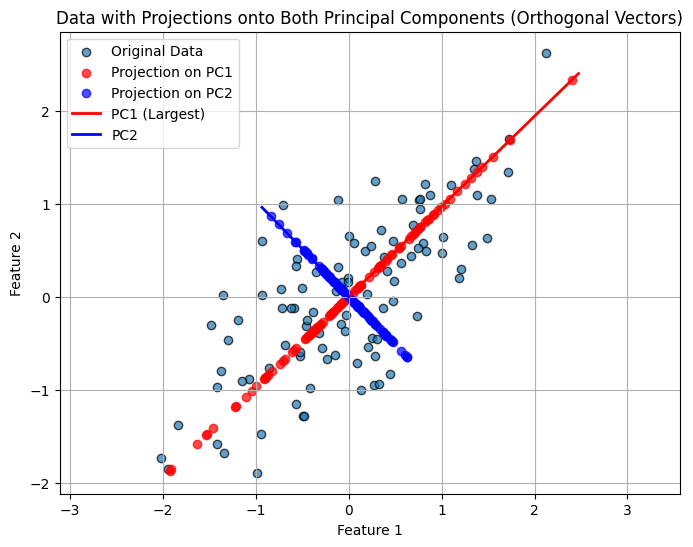

In [ ]:
# Plot the original data
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0], X_centered[:, 1], edgecolor='k', alpha=0.7, label='Original Data')

# Ensure the principal components are orthogonal and scaled correctly
pc1_start = -sorted_eigenvectors[:, 0] * np.sqrt(sorted_eigenvalues[0]) * scale_factor
pc1_end = sorted_eigenvectors[:, 0] * np.sqrt(sorted_eigenvalues[0]) * scale_factor

pc2_start = -sorted_eigenvectors[:, 1] * np.sqrt(sorted_eigenvalues[1]) * scale_factor
pc2_end = sorted_eigenvectors[:, 1] * np.sqrt(sorted_eigenvalues[1]) * scale_factor

# Plot the projections on PC1
plt.scatter(X_projected_pc1[:, 0], X_projected_pc1[:, 1], color='red', alpha=0.7, label='Projection on PC1')

# Plot the projections on PC2
plt.scatter(X_projected_pc2[:, 0], X_projected_pc2[:, 1], color='blue', alpha=0.7, label='Projection on PC2')

# Plot the principal component vectors ensuring orthogonality
plt.plot([0, pc1_end[0]], [0, pc1_end[1]], color='red', linewidth=2, label='PC1 (Largest)')
plt.plot([0, pc2_end[0]], [0, pc2_end[1]], color='blue', linewidth=2, label='PC2')

# Adding legend and titles
plt.title('Data with Projections onto Both Principal Components (Orthogonal Vectors)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensure equal scaling on both axes
plt.show()
